# Explore Twitter Streaming API

## Set-up

In [1]:
import os
import requests
import sys
import tweepy

from configparser import ConfigParser
from io import BytesIO
from PIL import Image

In [2]:
print(f"tweepy version: {tweepy.__version__}")

tweepy version: 4.10.0


In [3]:
CONFIG_FILE = 'catmonic_twitter.ini' # the project twitter config file

## Read config file to obtain twitter credentials etc

In [4]:
# check config file is present
config_path = os.path.abspath(CONFIG_FILE)

if not os.path.exists(config_path):
    print("Error: config file '{}' not found. Exiting!".format(CONFIG_FILE))
    sys.exit(1)

# parse the config file and read key twitter info
cfg = ConfigParser()
cfg.read(config_path)
    
account_name = cfg.get('twitter', 'account_name') 
consumer_key = cfg.get('twitter', 'consumer_key')
consumer_secret = cfg.get('twitter', 'consumer_secret')
access_token = cfg.get('twitter', 'access_token')
access_token_secret = cfg.get('twitter', 'access_token_secret')

# # print key info
# print('acount name: {}'.format(account_name))
# print('consumer key: {}'.format(consumer_key))
# print('consumer secret: {}'.format(consumer_secret))
# print('access token: {}'.format(access_token))
# print('access token secret: {}'.format(access_token_secret))

## Instantiate twitter API

In [9]:
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret, 
    access_token, access_token_secret
)

In [11]:
api = tweepy.API(auth)

## Use twitter API

In [12]:
# get the user object for boosimba...
api.get_user(screen_name='boosimba')

User(_api=<tweepy.api.API object at 0x00000260376BD940>, _json={'id': 3022268453, 'id_str': '3022268453', 'name': 'boosimba', 'screen_name': 'boosimba', 'location': 'UK', 'profile_location': None, 'description': 'Two cool #cats who like to tweet. Boo is fluffy and stays close to home. Simba comes home when hungry. Read about catmon on blog below. Now with auto cat id.', 'url': 'https://t.co/I44cnB4Jwn', 'entities': {'url': {'urls': [{'url': 'https://t.co/I44cnB4Jwn', 'expanded_url': 'http://terrysmusings.blogspot.co.uk/2015/03/catmon.html', 'display_url': 'terrysmusings.blogspot.co.uk/2015/03/catmon…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 23, 'friends_count': 0, 'listed_count': 3, 'created_at': 'Fri Feb 06 21:53:29 +0000 2015', 'favourites_count': 39, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 28272, 'lang': None, 'status': {'created_at': 'Mon Aug 08 07:39:18 +0000 2022', 'id':

In [13]:
# show screen name and followers count
user = api.get_user(screen_name=account_name)

print(f"{user.screen_name} has {user.followers_count} followers")

boosimba has 23 followers


In [14]:
# get recent boosimba tweets
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(f"tweet text: {tweet.text} (id={tweet.id})")
    if 'media' in tweet.entities:
        print(f"\tmedia_url: {tweet.entities['media'][0]['media_url']}")

tweet text: Hello Simba

[probability: 100.0%, image automatically identified by the catmon image classifier cnn, using MobileNetV2] (id=1556545571917160448)
tweet text: auto-tweet from catmon: 2022-08-08_083902.jpg https://t.co/LBphwH9gnn (id=1556545539054993409)
	media_url: http://pbs.twimg.com/media/FZn163xWYAALR_5.jpg
tweet text: Hello Boo

[probability: 100.0%, image automatically identified by the catmon image classifier cnn, using MobileNetV2] (id=1556515316091568128)
tweet text: auto-tweet from catmon: 2022-08-08_063851.jpg https://t.co/6wCg6DNQHy (id=1556515282797170689)
	media_url: http://pbs.twimg.com/media/FZnaZuuWQAEM39Z.jpg
tweet text: Hello Simba

[probability: 94.9%, image automatically identified by the catmon image classifier cnn, using MobileNetV2] (id=1556443061974179845)
tweet text: auto-tweet from catmon: 2022-08-08_015145.jpg https://t.co/8aly6IoS8D (id=1556443029812264965)
	media_url: http://pbs.twimg.com/media/FZmYsBdXkAAFE6S.jpg
tweet text: Hello Boo

[probabi

In [15]:
api = tweepy.API(auth)

In [32]:
BOOSIMBA_USER_ID = tweet.user.id
assert BOOSIMBA_USER_ID == 3022268453

In [17]:
# reply to tweet containing 'Boo chased a fox!'
# https://stackoverflow.com/questions/9322465/reply-to-tweet-with-tweepy-python
TWEET_REPLY = True
TWEET_ID = 1541050269101858816
if not TWEET_REPLY:
    api.update_status(
        status = 'Simba ran away', 
        in_reply_to_status_id = TWEET_ID, 
        auto_populate_reply_metadata=True
    )
else:
    print('already replied')

already replied


In [29]:
# show replies to tweet (note that this is very inefficient)
# https://stackoverflow.com/questions/29928638/getting-tweet-replies-to-a-particular-tweet-from-a-particular-user
def get_tweet_thread(username, tweet_id):
    replies = tweepy.Cursor(
        api.search_tweets, 
        q='to:{}'.format(username),
        since_id=tweet_id, 
        tweet_mode='extended'
    ).items()

    replied_thread = list()
    for reply in replies:
#         print(reply)
        if(reply._json['in_reply_to_status_id'] == tweet_id):
             replied_thread.append(reply._json['full_text'])
        
    return(replied_thread)

In [20]:
get_tweet_thread('boosimba', TWEET_ID)

[]

In [21]:
# show entities for last tweet
tweet.entities

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 1556104722918113280,
   'id_str': '1556104722918113280',
   'indices': [46, 69],
   'media_url': 'http://pbs.twimg.com/media/FZhlADrXgAAXGkb.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/FZhlADrXgAAXGkb.jpg',
   'url': 'https://t.co/2pvICgGdx4',
   'display_url': 'pic.twitter.com/2pvICgGdx4',
   'expanded_url': 'https://twitter.com/boosimba/status/1556104724419645440/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 640, 'h': 480, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 640, 'h': 480, 'resize': 'fit'},
    'medium': {'w': 640, 'h': 480, 'resize': 'fit'}}}]}

In [22]:
# explore tweet entities...
print(type(tweet))
print()
print(tweet.entities.keys())
print()
print(tweet.entities['media'])

<class 'tweepy.models.Status'>

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls', 'media'])

[{'id': 1556104722918113280, 'id_str': '1556104722918113280', 'indices': [46, 69], 'media_url': 'http://pbs.twimg.com/media/FZhlADrXgAAXGkb.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FZhlADrXgAAXGkb.jpg', 'url': 'https://t.co/2pvICgGdx4', 'display_url': 'pic.twitter.com/2pvICgGdx4', 'expanded_url': 'https://twitter.com/boosimba/status/1556104724419645440/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 640, 'h': 480, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 640, 'h': 480, 'resize': 'fit'}, 'medium': {'w': 640, 'h': 480, 'resize': 'fit'}}}]


In [23]:
# get url of image from last tweet
media_url = tweet.entities['media'][0]['media_url']
media_url

'http://pbs.twimg.com/media/FZhlADrXgAAXGkb.jpg'

### Show image from a tweet

In [24]:
def image_download(media_url):
    """Download image at given media_url."""
    response = requests.get(media_url)
    img = Image.open(BytesIO(response.content))
    
    return img

(640, 480)


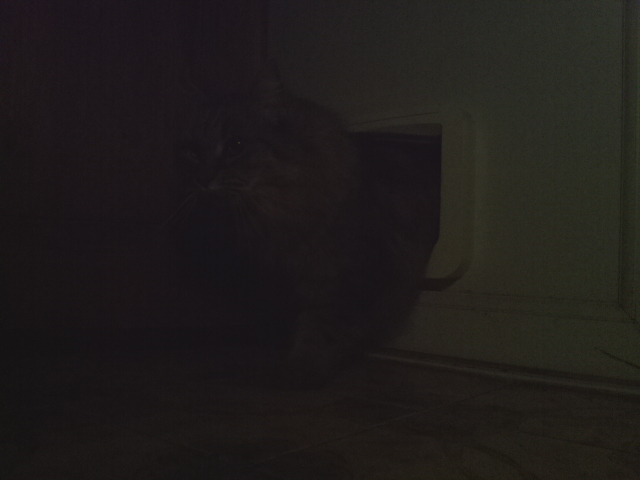

In [25]:
# show image from last tweet
img = image_download(media_url)
print(img.size)
display(img)

In [26]:
# handle a tweet
# will eventually contain an image classification

In [27]:
def handle_tweet(tweet):
    """Handle the boosimba catmon tweet, as required..."""
    BOOSIMBA_USER_ID = 3022268453
    BOOSIMBA_AUTOTWEET_TEXT = 'auto-tweet from catmon'
    print("handle tweet...")
    print(f"{tweet.user.name} (id={tweet.user.id}): {tweet.text}")
    if tweet.user.id == BOOSIMBA_USER_ID and tweet.text.startswith(BOOSIMBA_AUTOTWEET_TEXT):
        print("\tboosimba auto-tweet from catmon")
        media_url = tweet.entities['media'][0]['media_url']
        print(f"\tattached media: {media_url}")

        print("\tdownloading image...")
        img = image_download(media_url)

        print(f"\tdownloaded image size: {img.size}")
        display(img)  

handle tweet...
boosimba (id=3022268453): auto-tweet from catmon: 2022-06-26_175330.jpg https://t.co/m8ysGTPxyT
	boosimba auto-tweet from catmon
	attached media: http://pbs.twimg.com/media/FWMYd90WQAMLRD9.jpg
	downloading image...
	downloaded image size: (640, 480)


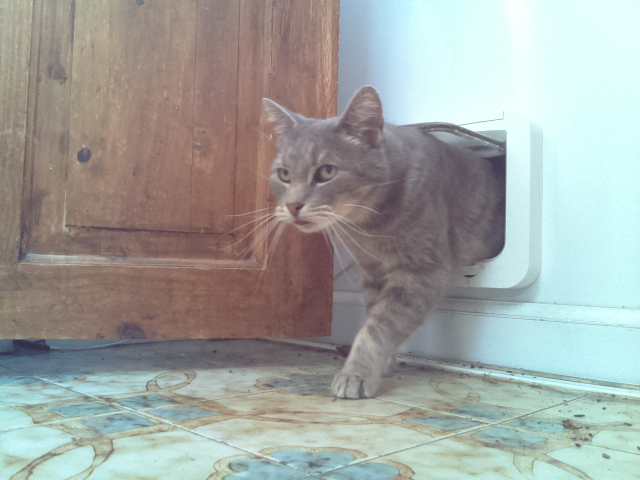

In [28]:
# test handler with example
EXAMPLE_TWEET_ID = 1541102402287423488
this_tweet = api.get_status(id=EXAMPLE_TWEET_ID)
handle_tweet(this_tweet)

## Investigate Streaming
- processes boosimba tweet stream
- handle boosimba catmon auto-tweets

In [30]:
# https://stackoverflow.com/questions/22675561/using-tweepy-to-stream-users-timeline-and-filtered-tweets
# https://web.archive.org/web/20140704092006/http://answers.oreilly.com/topic/2605-how-to-capture-tweets-in-real-time-with-twitters-streaming-api
class BooSimbaTweetHandler(tweepy.Stream):
          
    def image_download(media_url):
        """Download image at given media_url."""
        response = requests.get(media_url)
        img = Image.open(BytesIO(response.content))

        return img

    def handle_tweet(tweet):
        """Handle the boosimba catmon tweet, as required..."""
        BOOSIMBA_USER_ID = 3022268453
        BOOSIMBA_AUTOTWEET_TEXT = 'auto-tweet from catmon'
        print("handle tweet...")
        print(f"{tweet.user.name} (id={tweet.user.id}): {tweet.text}")
        if tweet.user.id == BOOSIMBA_USER_ID and tweet.text.startswith(BOOSIMBA_AUTOTWEET_TEXT):
            print("\tboosimba auto-tweet from catmon")
            media_url = tweet.entities['media'][0]['media_url']
            print(f"\tattached media: {media_url}")

            print("\tdownloading image...")
            img = image_download(media_url)

            print(f"\tdownloaded image size: {img.size}")
        display(img)  
        
    def on_status(self, tweet):
        print(f"Tweet detected for {tweet.user.name}: call tweet handler")
        handle_tweet(tweet)
        
    def on_error(self, status_code):
        print(f"Error detected: {status_code}")
        return True # Don't kill the stream

    def on_timeout(self):
        print(f"Timeout detected")
        return True # Don't kill the stream

In [31]:
print("Handling boosimba tweets...")
# instantiate handler
boosimba_tweet_handler= BooSimbaTweetHandler(
     consumer_key,
     consumer_secret,
     access_token,
     access_token_secret
)

# create a streaming API
boosimba_tweet_handler.filter(follow=[BOOSIMBA_USER_ID])

Handling boosimba tweets...


KeyboardInterrupt: 